<a href="https://colab.research.google.com/github/jean18/INF479-2021-1/blob/main/Tarea1/Tarea_1_INF_479.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/ISOTIPO-Color.jpg" title="Title text" width="20%" />

<hr style="height:2px;border:none"/>
<h1 align='center'> INF-479 Reconocimiento de patrones en minería de datos </h1>

<H2 align='center'> Tarea 1 - Clustering </H2>
<H3 align='center'> Nombre estudiante: Jean Franco Aravena Orellana </H3>
<H3 align='center'> Rol: 201673573-9</H3>
<hr style="height:2px;border:none"/>

# Instrucciones

1. La tarea debe ser desarrollada en parejas.  
2. Los medios de consultas serán Aula y el canal de Discord oficial del curso. 
3. La tarea debe ser realizada en Jupyter Notebook (Python3) utilizando este archivo como base.
4. Las librerías permitidas son las que se encuentran importadas en el Notebook. 
5. Se evaluará la correcta implementación de los Algoritmos de Clustering como también la comprensión de sus fundamentos teóricos y aplicaciones.
6. El archivo de entrega debe denominarse T1_Rol1_Rol2.ipynb. De no respetarse este formato existirá un descuento de 30 puntos. 
7. La fecha de entrega es el viernes 28 de mayo a las 23:55 hrs, posterior a esto se descontará 1 punto por cada minuto de atraso.  

In [1]:
# Librerías 
import sklearn.cluster as skl
from sklearn.metrics import silhouette_score
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
import numpy as np
import cv2
import pickle 
import community as community_louvain
import networkx as nx
from ipywidgets import interact

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

path = '/content/gdrive/MyDrive/Reconocimiento de patrones/Tarea 1/'

Mounted at /content/gdrive


In [3]:
# Cargar los datos
d1 = np.loadtxt(path + "Spiral.txt")
d2 = np.loadtxt(path + "R15.txt")
d3 = np.loadtxt(path + "cure-t2-4k.txt")

# Parte 1 (55 pts)

En esta primera parte de la tarea se estudiarán los algoritmos de Clustering K-means, Clustering jerárquico aglomerativo y DBSCAN, aplicados a 3 datasets de tipo vectorial. El objetivo es contrastar estos 3 algoritmos y determinar ventajas y desventajas frente a cada caso de estudio. Además, analizar el impacto de la elección de parámetros y medidas de proximidad. 

Para las implementaciones solicitadas, no necesitan generar el código de cada algoritmo a mano, por lo que pueden hacer uso de librerías que tengan estos algoritmos ya implementados. 

## 1.1 Dataset

Para esta primera parte se cuenta con 3 archivos:

1. <b>Spiral.txt</b> : $N=312, D=2$
2. <b>R15.txt</b> : $N=600, D=2$
3. <b>cute-t2-4k.txt</b> : $ N=4200, D=2$

Cada uno correspondiente a un dataset vectorial bidimensional, donde cada fila del archivo tiene el formato: $x_1$\t$x_2$. Siendo $x_1$ y $x_2$ los atributos de cada dato $X^{(i)}$ $\in \mathbf{R} ^{2}$ . 
Los datasets tienen una cantidad de puntos de 312, 600 y 4200 respectivamente.

## 1.2 K-Means (15 puntos)

1. Aplicar el algoritmo K-Means a cada uno de los datasets, utilizando distancia euclideana como medida de proximidad.
2. Realizar una gráfica para cada dataset donde se distinga claramente cada cluster obtenido y sus centroides.
3. Finalmente responder: 

    >a. ¿En cuál dataset se obtiene un mejor resultado utilizando este algoritmo? ¿Por qué? 
    
    >b. ¿Qué valor de k (cantidad de centroides) entrega un mejor resultado para cada uno de los datasets? ¿Qué método se podría utilizar para determinar un valor óptimo para k? 
    
<i> Hint: Para la pregunta 3.b, se sugiere utilizar la función interact de la librería [ipywidget](https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html).</i>

### Implementación

In [4]:
@interact(k=(2, 20))
def kmeans_plot(k):

  # cmap
  cmap = cm.get_cmap('viridis', k)

  kmeans1 = skl.KMeans(n_clusters=k, random_state=0).fit(d1)
  kmeans2 = skl.KMeans(n_clusters=k, random_state=0).fit(d2)
  kmeans3 = skl.KMeans(n_clusters=k, random_state=0).fit(d3)
  centroids_k1 = kmeans1.cluster_centers_
  centroids_k2 = kmeans2.cluster_centers_
  centroids_k3 = kmeans3.cluster_centers_


  fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6), dpi=80)
  fig.suptitle(f"K-Means utilizando k={k}", fontsize=20, y=1.05)

  ax1.scatter(d1[:,0], d1[:,1], s=30, c=kmeans1.labels_, edgecolors = "black", cmap=cmap)
  ax1.set_title("Spiral", size=15)

  ax2.scatter(d2[:,0], d2[:,1], s=30, c=kmeans2.labels_, edgecolors = "black", cmap=cmap)
  ax2.set_title("R15", size=15)

  ax3.scatter(d3[:,0], d3[:,1], s=30, c=kmeans3.labels_, edgecolors = "black", cmap=cmap)
  ax3.set_title("cure-t2-4k", size=15)

  # Annotate clusters
  for i in range(k):
    ax1.annotate(f'C{i+1}', (centroids_k1[i,0], centroids_k1[i,1]), size=7, weight='bold',
                  color='white', backgroundcolor=cmap.colors[i])
    
    ax2.annotate(f'C{i+1}', (centroids_k2[i,0], centroids_k2[i,1]), size=7, weight='bold',
                  color='white', backgroundcolor=cmap.colors[i])
    
    ax3.annotate(f'C{i+1}', (centroids_k3[i,0], centroids_k3[i,1]), size=7, weight='bold',
                  color='white', backgroundcolor=cmap.colors[i])
  
  plt.show()

interactive(children=(IntSlider(value=11, description='k', max=20, min=2), Output()), _dom_classes=('widget-in…

In [5]:
# Calculate silhouette 
silhouette_d1 = []
silhouette_d2 = []
silhouette_d3 = []

k = np.arange(2, 21)

for i in k:
  
  kmeans1 = skl.KMeans(n_clusters=i, random_state=0).fit(d1)
  kmeans2 = skl.KMeans(n_clusters=i, random_state=0).fit(d2)
  kmeans3 = skl.KMeans(n_clusters=i, random_state=0).fit(d3)

  # Silhouette score
  silhouette_d1.append(silhouette_score(d1, kmeans1.labels_))
  silhouette_d2.append(silhouette_score(d2, kmeans2.labels_))
  silhouette_d3.append(silhouette_score(d3, kmeans3.labels_))

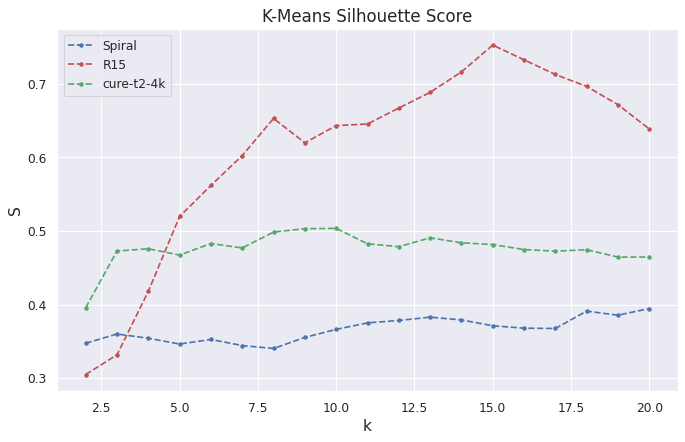

In [6]:
# Plot silhouette

fig = plt.figure(figsize=(10, 6), dpi=80)

plt.plot(k, silhouette_d1, 'b--.', label='Spiral')
plt.plot(k, silhouette_d2, 'r--.', label='R15')
plt.plot(k, silhouette_d3, 'g--.', label='cure-t2-4k')
plt.title("K-Means Silhouette Score", size=15)
plt.ylabel('S', size=14)
plt.xlabel('k', size=14)
plt.legend()

plt.show()

### Preguntas

 >a. ¿En cuál dataset se obtiene un mejor resultado utilizando este algoritmo? ¿Por qué? 

Se obtiene un mejor resultado en el dataset R15, porque en K-Means los centroides tienden a los lugares donde se tiene más densidad de datos y como el dataset es globular y homogéneo, es el caso perfecto para utilizar K-Means, cada nube de puntos tiene más o menos la misma cantidad de puntos y todos tienen una forma esférica, en el caso del dataset espiral para K-Means es imposible encontrar ese patrón dado que no es globular y los centroides tenderán a los lugares donde se encuentre el centro de masa, es decir, al medio de las 3 líneas que se forman, dado que lo que hace es minimizar las distancias intra clúster. El caso del dataset cure-t2-4k es más interesante, si bien tenemos algunas nubes de puntos de forma globular, la densidad de estos es muy diferente, existen algunos con muchos datos de forma sparse y otros con mucho menos, pero con una mayor concentración de puntos, por ende, el algoritmo no va a funcionar bien, aunque cabe destacar que le va mejor en este que en el caso del dataset Spiral.

Lo mencionado anteriormente se puede ver en la gráfica del coeficiente de silhouette vs k, en el dataset R15 K-Means para valores de k mayores o iguales que 5 se encuentra por encima del dataset cure-t2-4k y Spiral, ademas cure-t2-4k para todo valor de k siempre se encuentra por encima del dataset Spiral.

>b. ¿Qué valor de k (cantidad de centroides) entrega un mejor resultado para cada uno de los datasets? ¿Qué método se podría utilizar para determinar un valor óptimo para k? 

Existen varios métodos para seleccionar el k, uno de los más conocidos corresponde al método del ELBOW, el problema que tiene es que no está acotado, por lo cual es prácticamente imposible comparar tres dataset mirando solamente la gráfica del ELBOW, ademas es difícil de utilizar dado que encontrar el "codo" puede ser subjetivo, por ello se decide utilizar el coeficiente de silhouette dado que este si esta acotado y se encuentra entre -1 y 1 por ende, es posible utilizar este algoritmo para comparar el desempeño de K-Means en los 3 dataset. Se puede ver todo lo comentado en el punto anterior solo mirando la gráfica del coeficiente, donde podemos ver que a K-Means le va mejor en el dataset R15, seguido por el cure-t2-4k y finalmente por el Spiral.

Para el dataset R15 el mejor k corresponde a 15, que es justamente la cantidad de nube de puntos globulares que este tiene, para cure-t2-4k el mejor k corresponde a 10, aunque hay que considerar que solo llega a un valor de s=0.5, lo cual podria considerarse bajo, habria que probar en la practica si es de utilizad o no. Para el dataset Spiral el mejor k corresponde a 20 pero de nuevo hay que considerar lo anterior, solo se obtiene un s=0.4 lo cual es bastante bajo.

## 1.3 DBSCAN (15 puntos)

1. Aplicar el algoritmo DBSCAN a cada uno de los datasets.
2. Realizar una gráfica para cada dataset donde se distinga claramente cada cluster obtenido.
3. Finalmente responder: 
    > a. ¿En cuál dataset se obtiene un mejor resultado utilizando este algoritmo? ¿Por qué?
    
    > b. ¿Qué parámetros de Pts y minPts entregan el mejor resultado para cada gráfico? ¿Qué estrategia podríamos utilizar para escoger estos parámetros?  
    
<i> Hint: Para la pregunta 3.b, se sugiere utilizar la función interact de la librería [ipywidget](https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html).</i>

### Implementación

In [7]:
# Implementación
# label = -1 indica que es un outlier
@interact(eps=(0.1, 1, 0.1), minpts=(1,20))
def dbscan_plot(eps, minpts):
    
    # cmap
    cmap = cm.get_cmap('viridis')

    dbscan1 = skl.DBSCAN(eps=eps, min_samples=minpts).fit(d1)
    dbscan2 = skl.DBSCAN(eps=eps, min_samples=minpts).fit(d2)
    dbscan3 = skl.DBSCAN(eps=eps, min_samples=minpts).fit(d3)

    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(18,6), dpi=80)
    fig.suptitle(f"DBSCAN utilizando eps={eps} y minpts={minpts}", fontsize=20, y=1.05)
    
    ax1.scatter(d1[:, 0], d1[:, 1], s=30, c=dbscan1.labels_, edgecolors = "black", cmap=cmap)
    ax1.set_title(f"Spiral, cantidad de clusters = {len(np.unique(dbscan1.labels_)[1:])}", size=15)

    ax2.scatter(d2[:, 0], d2[:, 1], s=30, c=dbscan2.labels_, edgecolors = "black", cmap=cmap)
    ax2.set_title(f"R15, cantidad de clusters = {len(np.unique(dbscan2.labels_)[1:])}", size=15)

    ax3.scatter(d3[:, 0], d3[:, 1], s=30, c=dbscan3.labels_, edgecolors = "black", cmap=cmap)
    ax3.set_title(f"cure-t2-4k, cantidad de clusters = {len(np.unique(dbscan3.labels_)[1:])}", size=15)

    plt.show()

interactive(children=(FloatSlider(value=0.5, description='eps', max=1.0, min=0.1), IntSlider(value=10, descrip…

In [8]:
# Calculate silhouette 
silhouette = np.zeros((3, 10, 20))

eps = np.arange(0.1, 1.1, 0.1)
minpts = np.arange(1, 21, 1)

for i, e in enumerate(eps):

  for j, minpt in enumerate(minpts):

    dbscan1 = skl.DBSCAN(eps=e, min_samples=minpt).fit(d1)
    dbscan2 = skl.DBSCAN(eps=e, min_samples=minpt).fit(d2)
    dbscan3 = skl.DBSCAN(eps=e, min_samples=minpt).fit(d3)

    # El coeficiente de silhouette no esta definido cuando tenemos solo 1 cluster
    # Si ese es el caso, se deja como valor un cero
    # [dataset, eps, minpts]
    silhouette[0, i, j] = 0 if len(np.unique(dbscan1.labels_))==1 else silhouette_score(d1, dbscan1.labels_)
    silhouette[1, i, j] = 0 if len(np.unique(dbscan2.labels_))==1 else silhouette_score(d2, dbscan2.labels_)
    silhouette[2, i, j] = 0 if len(np.unique(dbscan3.labels_))==1 else silhouette_score(d3, dbscan3.labels_)

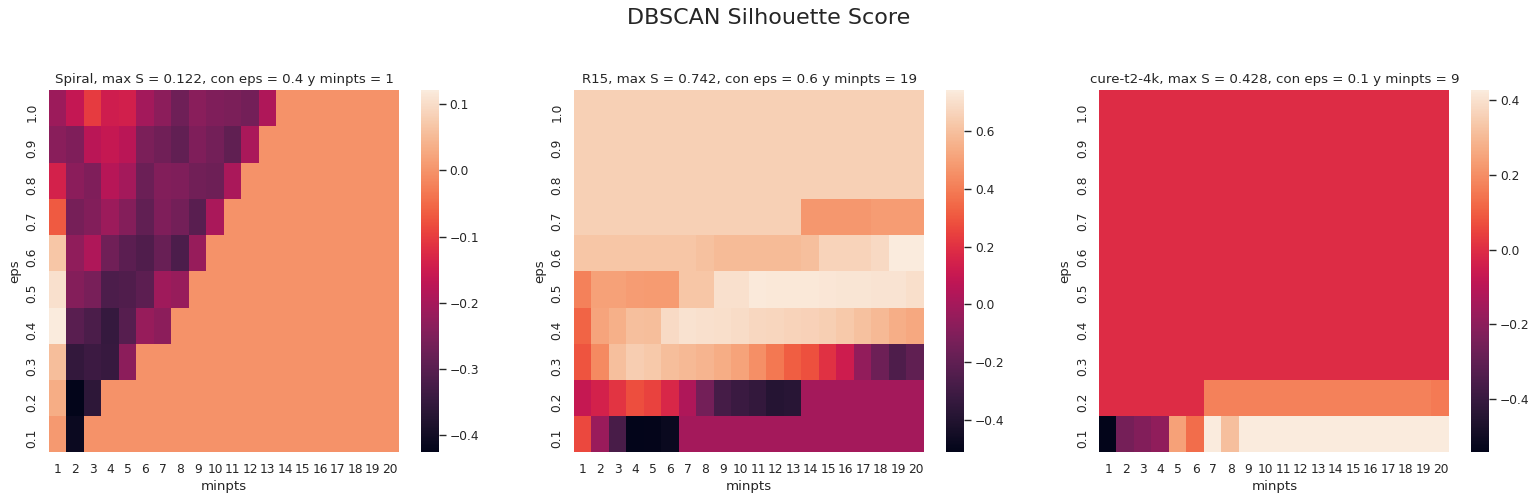

In [9]:
# Pasar los datos al dataframe
df1 = pd.DataFrame(data = silhouette[0, :, :], columns=minpts, index=eps)
df2 = pd.DataFrame(data = silhouette[1, :, :], columns=minpts, index=eps)
df3 = pd.DataFrame(data = silhouette[2, :, :], columns=minpts, index=eps)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 6), dpi=80)
fig.suptitle('DBSCAN Silhouette Score', fontsize=20, y=1.05)

sns.heatmap(df1, ax=ax1, yticklabels=df1.index.values.round(1))
ax1.invert_yaxis()
ax1.update({'title': f'Spiral, max S = {np.round(np.max(df1).max(), 3)}, ' +
                     f'con eps = {eps[np.where(df1 == df1.max().max())[0][0]]} y ' +
                     f'minpts = {minpts[np.where(df1 == df1.max().max())[1][0]]}',
            'xlabel':'minpts', 
            'ylabel':'eps'})

sns.heatmap(df2, ax=ax2, yticklabels=df1.index.values.round(1))
ax2.invert_yaxis()
ax2.update({'title': f'R15, max S = {np.round(np.max(df2).max(), 3)}, ' +
                     f'con eps = {eps[np.where(df2 == df2.max().max())[0][0]]} y ' +
                     f'minpts = {minpts[np.where(df2 == df2.max().max())[1][0]]}',
            'xlabel':'minpts', 
            'ylabel':'eps'})

sns.heatmap(df3, ax=ax3, yticklabels=df1.index.values.round(1))
ax3.invert_yaxis()
ax3.update({'title': f'cure-t2-4k, max S = {np.round(np.max(df3).max(), 3)}, ' +
                     f'con eps = {eps[np.where(df3 == df3.max().max())[0][0]]} y ' + 
                     f'minpts = {minpts[np.where(df3 == df3.max().max())[1][0]]}',
            'xlabel':'minpts', 
            'ylabel':'eps'})

plt.show()

### Preguntas

> a. ¿En cuál dataset se obtiene un mejor resultado utilizando este algoritmo? ¿Por qué?

Mirando el coeficiente de silhouetta nos podemos dar cuenta que sucede casi lo mismo que en K-Means, para ciertos parámetros le va bien con el dataset R15, lo destacable es que bajo ciertos parámetros tiene la capacidad de detectar el patrón en el dataset cure-t2-4k, pero falla rotundamente en el dataset Spiral. Le va bien en el dataset R15 porque DBSCAN se basa en densidades y en este caso como tenemos densidades similares, es capaz de encontrar los 15 clusters con ciertos parámetros, en el dataset Spiral se tiene mayor densidad en el centro de la espiral pero luego se empiezan a separar los puntos por lo cual si dejamos el parámetro asociado al radio(eps) fijo, por ejemplo a 0.5 y aumentamos el valor de minpts, DBSCAN empieza a encontrar muy pocos clusters y todos en torno al centro de la espiral, y si disminuimos el valor de minpts empieza a encontrar muchos clusters, en cambio si dejamos fijo a minpts por ejemplo a 3, y empezamos a disminuir el valor de eps, este empieza a encontrar pocos clusters dado que a medida que se va alejando de la espiral no tiene la capacidad de dejarlos en el mismo cluster porque el eps le va quedando "pequeño" a medida que se va alejando, causando así que el algoritmo nos marque a todo lo demás como outliers, y finalmente si aumentamos el eps vamos a ir obteniendo más clusters pero el punto es que nunca se podrá detectar este patrón porque las variables son fijas, no se pueden adaptar a medida que se va corriendo el algoritmo. Finalmente, en el dataset cure-t2-4k es donde mejor le va y donde DBSCAN destaca, porque el gran problema que tiene este dataset es que se ven 5 nubes de puntos con densidad más o menos similar, pero con mucho ruido entre ellos, esta es una de las razones por la cual K-Means tiene problemas con este dataset, pero a DBSCAN no le sucede lo mismo, es más robusto en casos de outliers, tiene la capacidad de detectarlos, por lo cual bajo ciertos parámetros detecta el patrón perfectamente.

Una cosa interesante que se puede apreciar mirando la gráfica del coeficiente de silhouette es lo sensible que es este algoritmo a los parámetros, una pequeña variación de estos cambia bruscamente los resultados, por lo cual hay que tener cuidado cuando se usa.

> b. ¿Qué parámetros de Pts y minPts entregan el mejor resultado para cada gráfico? ¿Qué estrategia podríamos utilizar para escoger estos parámetros?  

Igual que en el caso de K-Means para escoger los parámetros se grafica el coeficiente de silhouette, este nos dice que para el primer dataset (Spiral) los mejores parámetros corresponden a eps = 0.4 y minpts = 1, lo cual nos entrega un s = 0.122, para el dataset R15 los mejores parámetros son eps = 0.6 y minpts = 19 lo que nos da un s = 0.742 y para el dataset cure-t2-4k los mejores valores son eps = 0.1 y minpts = 9 lo cual nos entrega un s = 0.428.

## 1.4 Hierarchical Agglomerative Clustering  (15 puntos)

1. Aplicar el algoritmo HAC a cada uno de los datasets, utilizando tanto single link como complete link. Puede escoger la cantidad de cluster que estime conveniente. 
2. Realizar una gráfica para cada dataset donde se distinga claramente cada cluster obtenido.
3. Finalmente responder: 

    > a. ¿En cuál dataset se obtiene un mejor resultado utilizando este algoritmo? ¿Por qué? 
    
    > b. ¿En cuál o cuáles datasets se obtiene un mejor resultado para HAC utilizando single-link? ¿Por qué?  
    

### Implementación

In [10]:
# Implementación

@interact(clusters=(2,20), link=["single", "complete", "ward"])
def hac_plot(clusters,link):

    # cmap
    cmap = cm.get_cmap('viridis', clusters)
    
    hac1=skl.AgglomerativeClustering(n_clusters=clusters,linkage=link).fit(d1)
    hac2=skl.AgglomerativeClustering(n_clusters=clusters,linkage=link).fit(d2)
    hac3=skl.AgglomerativeClustering(n_clusters=clusters,linkage=link).fit(d3)

    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(18, 6), dpi=80)
    fig.suptitle(f"HAC utilizando N° clusters = {clusters} y tipo de link = {link}", fontsize=20, y=1.05)

    
    ax1.scatter(d1[:, 0], d1[:, 1], s=30, c=hac1.labels_, edgecolors = "black", cmap=cmap)
    ax1.set_title("Spiral", size=15)

    ax2.scatter(d2[:, 0], d2[:, 1], s=30, c=hac2.labels_, edgecolors = "black", cmap=cmap)
    ax2.set_title("R15", size=15)

    ax3.scatter(d3[:, 0], d3[:, 1], s=30, c=hac3.labels_, edgecolors = "black", cmap=cmap)
    ax3.set_title("cure-t2-4k", size=15)

    plt.show()

interactive(children=(IntSlider(value=11, description='clusters', max=20, min=2), Dropdown(description='link',…

In [11]:
#calculate silhouette 
silhouette = np.zeros((3, 3, 19))

clusters = np.arange(2, 21)
link=["single", "complete", "ward"]

for i, k in enumerate(clusters):
  
  for j, metodo in enumerate(link):

    hac1 = skl.AgglomerativeClustering(n_clusters=k, linkage=metodo).fit(d1)
    hac2 = skl.AgglomerativeClustering(n_clusters=k, linkage=metodo).fit(d2)
    hac3 = skl.AgglomerativeClustering(n_clusters=k, linkage=metodo).fit(d3)

    # [dataset, link, clusters]
    silhouette[0, j, i] = silhouette_score(d1, hac1.labels_)
    silhouette[1, j, i] = silhouette_score(d2, hac2.labels_)
    silhouette[2, j, i] = silhouette_score(d3, hac3.labels_)

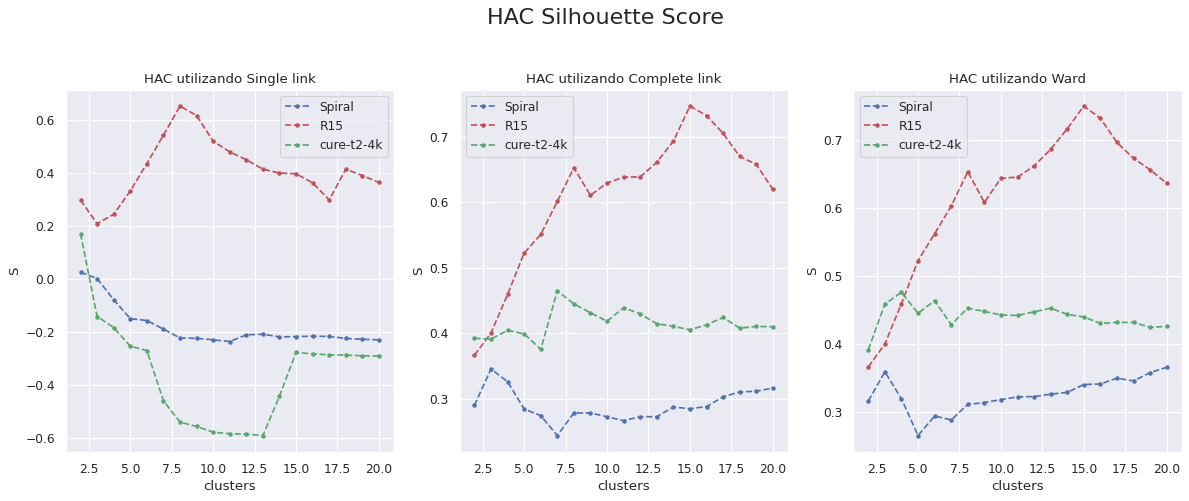

In [12]:
# plot silhouette

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6), dpi=80)
fig.suptitle('HAC Silhouette Score', fontsize=20, y=1.05)

ax1.plot(clusters, silhouette[0, 0, :], 'b--.', label='Spiral')
ax1.plot(clusters, silhouette[1, 0, :], 'r--.', label='R15')
ax1.plot(clusters, silhouette[2, 0, :], 'g--.', label='cure-t2-4k')
ax1.update({'title':'HAC utilizando Single link', 
            'xlabel':'clusters', 
            'ylabel':'S'})
ax1.legend()

ax2.plot(clusters, silhouette[0, 1, :], 'b--.', label='Spiral')
ax2.plot(clusters, silhouette[1, 1, :], 'r--.', label='R15')
ax2.plot(clusters, silhouette[2, 1, :], 'g--.', label='cure-t2-4k')
ax2.update({'title':'HAC utilizando Complete link', 
            'xlabel':'clusters', 
            'ylabel':'S'})
ax2.legend()

ax3.plot(clusters, silhouette[0, 2, :], 'b--.', label='Spiral')
ax3.plot(clusters, silhouette[1, 2, :], 'r--.', label='R15')
ax3.plot(clusters, silhouette[2, 2, :], 'g--.', label='cure-t2-4k')
ax3.update({'title': 'HAC utilizando Ward',
            'xlabel':'clusters', 
            'ylabel':'S'})
ax3.legend()

plt.show()

### Preguntas

> a. ¿En cuál dataset se obtiene un mejor resultado utilizando este algoritmo? ¿Por qué? 

En el dataset Spiral cuando utilizamos la variante single link se obtiene el mejor resultado, dado que a diferencia de K-Means y DBSCAN, tiene la capacidad de detectar el patrón perfectamente, esto se debe a que HAC en su variante single link al momento de unir dos puntos minimiza la distancia entre ellos, lo que trae como consecuencia un efecto en cadena, primero une los puntos más cercanos, luego sigue con los siguiente más cercanos y así continua, si vemos el dataset Spiral, HAC parte uniendo los puntos que se encuentran en el centro y continua siguiendo la línea dado que seguir la línea será siempre la mínima distancia entre dos puntos.

 > b. ¿En cuál o cuáles datasets se obtiene un mejor resultado para HAC utilizando single-link? ¿Por qué?

Se obtiene un mejor resultado en el dataset Spiral por lo mencionado anteriormente, pero cabe mencionar que si utilizamos la variante complete link o ward no existe ninguna posibilidad de detectar el patrón en el dataset Spiral, dado que complete link maximiza la distancia entre dos puntos y ward minimiza la varianza intra-cluster, estos dos últimos métodos son más útiles en el dataset R15 que en el dataset cure-t2-4k dado que este último presenta mucho ruido y estos métodos son sensibles a los outliers (noise).

## 1.5 Conclusiones  (10 puntos)

Analizando las gráficas obtenidas, responda las siguientes preguntas:
> a. ¿Qué algoritmo entregó un mejor resultado para cada dataset? Compare las ventajas y desventajas de cada algoritmo utilizado en relación a las características de los clusters de cada dataset y concluya. Para esta comparación, básese en los resultados para los mejores valores de k, Pts y minPts obtenidos. 


Para el dataset Spiral el que encuentra el mejor resultado es HAC considerando la variante single link con un k = 3, esto se debe a que el dataset tiene una estructura un tanto peculiar, donde el patrón está compuesto por 3 cadenas exactamente, es decir tres líneas de puntos, pero el desempeño de este algoritmo en los demás dataset no es muy bueno, en ese caso la variante complete link y ward obtienen mejores resultados, con un k=15 son capaces de encontrar el patrón asociado al dataset R15, pero no así en el caso del dataset cure-t2-4k dado que este algoritmo es sensible al ruido. En este último caso lo mejor es usar DBSCAN con eps = 0.1 y minpts = 9, ahí si se reconoce el patrón e incluso el algoritmo detecta en gran parte el ruido que presenta el dataset. En el dataset R15 lo mejor es usar K-Means con k=15 dado que con estos valores es capaz de reconocer perfectamente el patrón y ademas este algoritmo es especial para esos casos en que el dataset es globular y homogéneo en densidad, ademas tiene la ventaja de ser un algoritmo relativamente sencillo de entender e implementar.

> b. ¿Qué algoritmo entregó el peor resultado para cada dataset? Justifique.

Para el dataset Spiral el algoritmo que entrego el peor resultado es DBSCAN dado que para la mayoria de los valores de los parámetros obtiene un coeficiente de silhouette negativo, ademas en la mayoria de los casos no es capaz de detectar ningún cluster, debido a lo sensible que es a los parámetros termina marcando todo el dataset como outliers lo cual no nos sirve, no aporta valor. El problema general que enfrenta DBSCAN es la diferencia de densidades que presenta el cluster a medida que se va alejando la espiral del centro, esa es la razón principal de su mal desempeño. Para el dataset R15 el peor desempeño corresponde al algoritmo HAC con su variante single link, dado que en el centro las nubes de puntos se encuentran más o menos cercanas entre sí, como este minimiza la distancia entre puntos, junta cluster que claramente son distintos, genera el mismo efecto en cadena que lo beneficia en el dataset Spiral solo que en este caso es lo que lo perjudica totalmente. Para el ultimo dataset nuevamente HAC en su variante single link presenta el peor resultado por lo mismo que lo anterior, empieza a generar una cadena a través del ruido dejando prácticamente todo el dataset en un gran cluster.

---
# Parte 2 - Image Segmentation (20 pts)

La segmentación de imagen (Image Segmentation) es un problema de visión computacional que apunta al particionamiento de una imagen en diferentes áreas de pixeles que tienen atributos similares. Eso se realiza generando una máscara sobre la imagen que asigna una etiqueta a cada pixel y donde pixeles con la misma etiqueta forman parte de la misma región. 

La segmentación de imágenes se utiliza principalmente para detectar objetos o bordes en imágenes, y tiene diversas aplicaciones como lo son la identificación de células cancerígenas en exámenes médicos, identificación de cuerpos de interés en imágenes satelitales, entre otras. 


<img src="https://dl.acm.org/cms/attachment/8542befb-3134-46f0-a5ad-1534c63188b4/csur5204-73-f01.jpg" title="Title text" width="80%" />
<center> <i> Figura 1. Ejemplo de Image Segmentation. </i> </center>


## Preguntas

 
1. Realice Image Segmentation utilizando el algoritmo K-Means para la imagen1.jpg y la imagen2.jpg
2. Muestre gráficamente el resultado de la segmentación en ambas imágenes donde se distingan claramente los clusters obtenidos. Concluya.

> Para la pregunta 1, antes de realizar la segmentación se debe realizar un preprocesamiento de las imágenes que consiste en lo siguiente: 

> 1.En primer lugar, se debe vectorizar la imagen transformando la imagen inicial de dimensiones $p_{w}xp_{h}x3$ en  un array resultante de dimensiones $Kx3$, siendo $K= p_{h}p_{w}$ donde $p_w$ y $p_h$ son el número de pixeles de ancho y alto de la foto respectivamente. 

> 2.Antes de aplicar la segmentación con K-Means, se debe transformar los valores del arreglo resultante desde uint8 a float32 para poder aplicar el algoritmo K-Means implementado en la librería cv2.


In [13]:
# Implementacion
@interact(imagen=["imagen1.jpg", "imagen2.jpg"], clusters=(2, 20))
def im_segmentation_plot(imagen, clusters):

  im = cv2.imread(path + imagen)
  pixels = im.reshape(im.shape[0] * im.shape[1],  im.shape[2]) # Reshape de la imagen
  pixels = np.float32(pixels) # Transformacion de valores del arreglo desde uint8 a float32

  k = clusters # Numero de clusters

  # Se define criterio de termino con 100 iteraciones o epsilon de 0.85
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)

  retval, labels, centers = cv2.kmeans(pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
  centers = np.uint8(centers)
  segmented_data = centers[labels.flatten()]
  final = segmented_data.reshape(im.shape[0], im.shape[1], im.shape[2])

  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6), dpi=80)
  fig.suptitle(f"{imagen}, cantidad de clusters = {clusters}", fontsize=20)

  ax1.imshow(im)
  ax1.set_title('Imagen normal', size=14)
  ax1.grid(False)
  ax1.axis('off')

  ax2.imshow(final)
  ax2.set_title('Imagen segmentada', size=14)
  ax2.grid(False)
  ax2.axis('off')

interactive(children=(Dropdown(description='imagen', options=('imagen1.jpg', 'imagen2.jpg'), value='imagen1.jp…

Comentar

---
# Parte 3 - Community Detection (25 pts) 

En la última parte de la tarea, se estudiará el algoritmo Louvain para Detección de Comunidades aplicado al dataset de grafos "Enron email network". 

## Dataset

* Para esta parte de la tarea, trabajaremos con el dataset de grafos <b>"Enron email network"</b>, el cual contiene las interacciones vía correo electrónico de 36692 trabajadores y trabajadoras de la compañía energética estadounidense "Enron". 
* Este dataset se encuentra contenido en el archivo adjunto "Email-Enron.txt" en el cual se enumeran todos los pares de correos electrónicos de dicha empresa entre los cuales se ha enviado al menos un mensaje. 
* El archivo contiene 183831 líneas, las cuales corresponden al total de aristas no dirigidas del grafo y su formato por línea es:

<blockquote> #Nodo_origen \t #Nodo_destino. </blockquote>

## Community Detection

El problema de <b>Detección de Comunidades</b> es un problema fundamental en análisis de redes y consiste en buscar grupos de nodos que tengan ciertas propiedades en común y que, por tanto, sean más similares entre si que con otros nodos. A estos conjuntos de nodos les llamamos "comunidades". 

Si modelamos las interacciones de un conjunto de personas en un determinado contexto como un grafo, tendríamos que los nodos corresponderían a las personas y las aristas a las interacciones entre ellas. En este contexto, podemos definir a una comunidad como un subconjunto de nodos del grafo que están densamente conectados entre sí y débilmente conectados a los nodos en otras comunidades dentro del grafo. 

Para esto, podemos utilizar el algoritmo Louvain de Detección de comunidades para realizar Clustering en grafos, en el cual los clusters obtenidos corresponderán a las comunidades dentro del grafo. 


## Algoritmo Louvain 

Es un algoritmo para detección de comunidades en redes complejas o grafos, ideado en 2008 por investigadores de la Universidad Católica de Bélgica, cuyo objetivo es maximizar la modularidad de un grafo. 

¿Qué es la modularidad? Es una medida que compara la cantidad de aristas dentro y fuera de la comunidad, la cual está expresada por la siguiente ecuación para grafos con peso:  

\begin{equation*}
    Q = \dfrac{1}{2m} \sum_{i,j} [ A_{ij} - \dfrac{k_{i}k_{j}}{2m}] \delta (c_{i}, c_{j})
\end{equation*}

Donde:

* $A_{ij}$ es el peso de la arista entre $i$ y $j$
* $k_{i}$, $k_{j}$ son la suma de los pesos de las aristas conectadas a los nodos i y j respectivamente
* $m$ es la suma de todos los pesos de las aristas en el grafo
* $\delta$ es la función delta de Kronecker. La cual es 1 si $x = y$ y 0 en el caso contrario. 
* $Q \in [-1,1]$


Para optimizar la modularidad, el algoritmo realiza los siguientes pasos: 
1. Inicialmente, cada nodo constituye una comunidad. 
2. Luego, se selecciona un nodo al azar y se evalúa si la partición tiene mejor modularidad al asignar dicho nodo a la comunidad de alguno de sus vecinos. 
3. Si la modularidad de la partición actual es mejor, el nodo se queda en su comunidad. 
4. Si la modularidad de la partición al asignar el nodo a uno de sus vecinos es mejor, se asigna dicho nodo a la comunidad de dicho vecino. 
5. Se sigue seleccionando nodos al azar y realizando los pasos anteriores, hasta que las particiones obtenidas en dos pasos seguidos sean iguales. 


> Para esta implementación, se debe instalar la librería [Python-Louvain](https://github.com/taynaud/python-louvain) (<i>leer documentación y pasos de instalación</i>). Además, utilice la librería networkx para elaborar el grafo. 

## Preguntas

1. Cargar el dataset en un grafo de networkx.
2. Aplicar el algoritmo Louvain para Clustering en el grafo. 
3. Generar un nuevo archivo "out.txt" con los nodos etiquetados. 
4. Mostrar gráficamente 5 comunidades. No importa si estas comunidades están conectadas las unas a las otras.  

In [14]:
# Descargar el archivo pos.pickle
!wget -q 'https://github.com/jean18/INF479-2021-1/raw/main/Tarea1/pos.pickle'

In [15]:
# Implementación
G = nx.read_edgelist(path + "Email-Enron.txt")

# pos = nx.spring_layout(G) (se demora como una hora aprox, por eso el archivo se guardo para no tener que esperar tanto)
with open('pos.pickle', 'rb') as f:
  pos = pickle.load(f)

nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 36692\nNumber of edges: 183831\nAverage degree:  10.0202'

In [16]:
# Compute best partition and save in output.txt
partition = community_louvain.best_partition(G)
with open('out.txt', 'w') as f:
    print(partition, file=f)

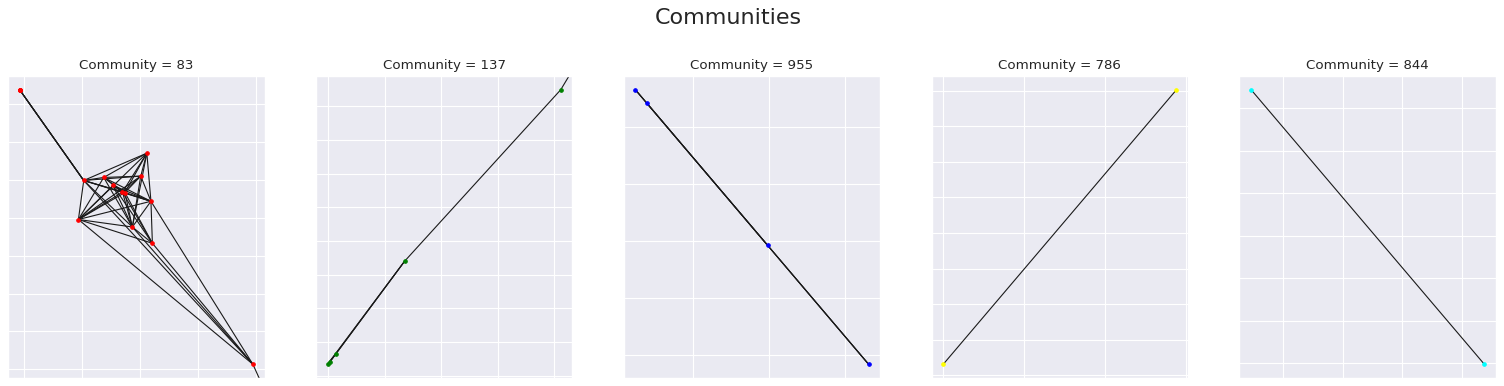

In [21]:
# Drawing
fig, ax = plt.subplots(1, 5, figsize=(24, 5), dpi=80)
fig.suptitle('Communities', fontsize=20, y=1.05)

# Select 5 random community without duplicates (replace=False)
communities = np.random.choice(list(set(partition.values())), 5, replace=False)
colors = ['red', 'green', 'blue', 'yellow', 'cyan']

for i, axi in enumerate(ax.flat):
  com = communities[i]
  list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
  edges = [(v1,v2) for (v1,v2) in G.edges if v1 and v2 in list_nodes]
  nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 10, node_color=colors[i], ax=axi)
  nx.draw_networkx_edges(G, pos, edges, ax=axi)
  axi.set_title(f"Community = {com}", size=12)